# Предобработка данных

In [50]:
import pandas as pd
import numpy as np
import subfunc as sf

In [73]:
RAW_DATA = 'data/evras.csv'
POST_PROCESSING_TRAIN_DATA = 'data/X_train.csv'
POST_PROCESSING_TRAIN_DATA_LABELS = 'data/y_train.csv'
POST_PROCESSING_TEST_DATA = 'data/X_test.csv'
POST_PROCESSING_TEST_DATA_LABELS = 'data/y_test.csv'
SOURCE_DATA = 'source/'
pd.options.display.max_columns = 90
target_columns = ['химшлак последний Al2O3',
                  'химшлак последний CaO',
                  'химшлак последний R',
                  'химшлак последний SiO2']

Информация о данных

In [52]:
data = pd.read_csv(RAW_DATA, sep=';', index_col='index', decimal=',')
data.describe(include='all')

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
count,7041,7041,7041,7041,6444.000000,6440.000000,6440.000000,6444.000000,5249.000000,6435.000000,5883.000000,6431.000000,6431.000000,6178.000000,6436.000000,6436.000000,6426.000000,1389.000000,6440.000000,6444.000000,6444.000000,6444.0,6444.0,6426.000000,1389.000000,724.000000,4770.000000,1.300000e+01,6422.000000,7.000000,6307.000000,5910.000000,6244.000000,33.000000,5.000000,383.000000,6179.000000,6400.000000,82.000000,6398.000000,1017.000000,5883.000000,6440.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6443.000000,6443.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6218.000000,6444.000000,6444.000000,6444.000000,6444.000000,6442.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,4742.000000,6444.000000,6444.000000,6443.000000,6444.000000,6444.000000,4742.000000,4742.000000,6444.000000,6444.000000,6443.000000,6444.000000,6444.000000,4742.000000
unique,7041,7041,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,г683863>=;>,2071-02-26 23:57:00,Э76ХФ,Р65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,4953,6427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,26.492241,46.194099,21.010523,46.063051,3.004414,0.403088,0.117692,0.139068,0.130561,0.051366,1567.771753,1587.973897,11.593261,13.227743,12989.038791,114.404252,1.009001,1.0,1.0,15.450528,10.547284,0.020862,0.132179,2.000000e-02,0.066706,0.385714,0.420162,0.054730,0.020086,0.019429,0.044000,0.023845,0.061368,0.143436,0.039869,0.215540,0.026624,0.208039,4557.236180,0.001782,0.466162,0.273289,0.101999,0.672277,0.007049,0

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7040
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nplv                            7041 non-null   object 
 1   DT                              7041 non-null   object 
 2   МАРКА                           7041 non-null   object 
 3   ПРОФИЛЬ                         7041 non-null   object 
 4   t вып-обр                       6444 non-null   float64
 5   t обработка                     6440 non-null   float64
 6   t под током                     6440 non-null   float64
 7   t продувка                      6444 non-null   float64
 8   ПСН гр.                         5249 non-null   float64
 9   чист расход C                   6435 non-null   float64
 10  чист расход Cr                  5883 non-null   float64
 11  чист расход Mn                  6431 non-null   float64
 12  чист расход Si                  64

Нахождение самой популярной марки

In [54]:
top_mark = data.describe(include='all').loc["top", "МАРКА"]
print("Самая популярная марка - ", top_mark)

Самая популярная марка -  Э76ХФ


Процент пропущенных значений в датасете

In [55]:
data.isnull().sum().sort_values(ascending= False).apply(lambda x : x / data.shape[0])[:15]

ферспл FeSi-75                0.999290
сыпуч  кокс. мелочь (сух.)    0.999006
сыпуч кварцит                 0.998154
ферспл FeMo                   0.995313
ферспл  Ni H1 пласт.          0.988354
ферспл FeV азот.              0.945604
расход C пров.                0.897174
ферспл  ферванит              0.855560
расход газ  N2                0.802727
N2 (интенс.)                  0.802727
химшлак первый SiO2_1         0.326516
химшлак последний Al2O3       0.326516
химшлак первый Al2O3_1        0.326516
химшлак последний SiO2        0.326516
сыпуч известь РП              0.322539
dtype: float64

Перевод даты во время изготовления сплава

In [56]:
data['DT'] = sf.date_to_interval(data['DT'])

Оставляем колонки с > 65% известных данных

In [57]:
dropped_data = sf.drop_columns(data,0.65)
marked_data = dropped_data[dropped_data['МАРКА'] == top_mark]
marked_data = marked_data.drop(columns= ['nplv','ПРОФИЛЬ', 'МАРКА'])

Удаленные колонки: N2 (интенс.), расход газ  N2, расход C пров., сыпуч кварцит, сыпуч  кокс. мелочь (сух.), ферспл FeMo, ферспл FeSi-75, ферспл FeV азот., ферспл  Ni H1 пласт., ферспл  ферванит


Удаляем строки, где пропущены значения для целевых переменных

In [58]:
marked_data = marked_data.dropna(axis = 0,subset = target_columns)

 * Заполняем пропущенные данные нулями

In [60]:
marked_data = marked_data.fillna(0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


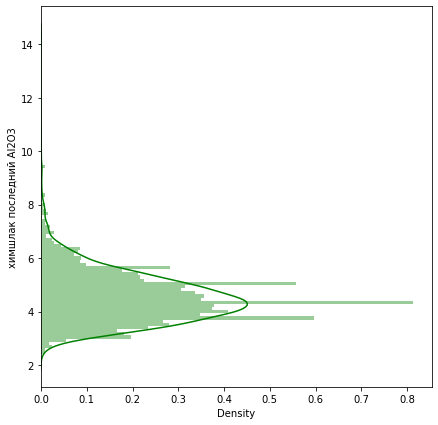

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 7))
sns.distplot(marked_data['химшлак последний Al2O3'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_1.png')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


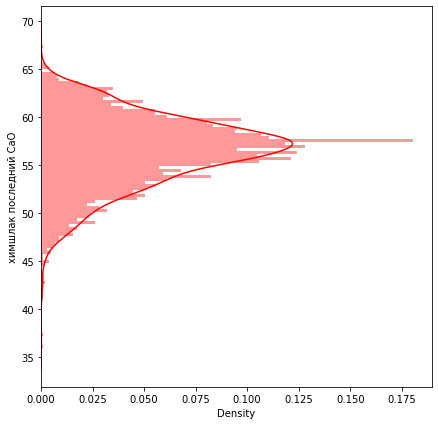

In [62]:
plt.figure(figsize=(7, 7))
sns.distplot(marked_data['химшлак последний CaO'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_2.png')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


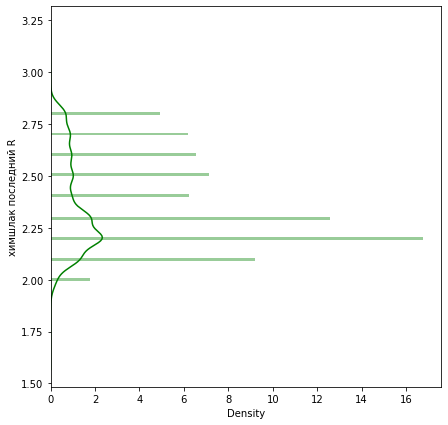

In [63]:
plt.figure(figsize=(7, 7))
sns.distplot(marked_data['химшлак последний R'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_3.png')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


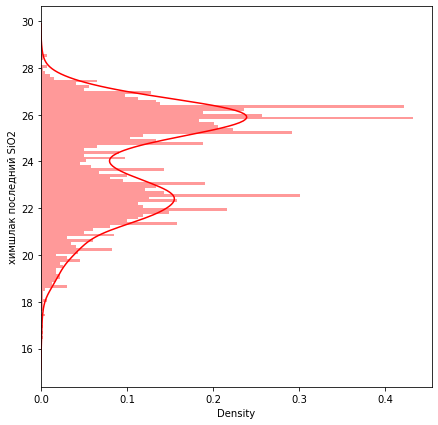

In [64]:
plt.figure(figsize=(7, 7))
sns.distplot(marked_data['химшлак последний SiO2'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_4.png')

In [65]:
normalized_data = sf.normalize_data(marked_data)
del marked_data

In [45]:
corr_data = normalized_data.drop(columns=target_columns).corr()

#plt.figure(figsize=(52, 50))

#sns.heatmap(corr_data[(corr_data >= 0.5) | (corr_data <= -0.4)],
 #          cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
 #          annot=True, annot_kws={"size": 8}, square=True)
#plt.savefig(f'{SOURCE_DATA}correletion_map.png')

In [46]:
useless_list = []
for ind in corr_data.index:
    for col in corr_data.columns:
        if ind != col and abs(corr_data.loc[ind, col] >= 0.8 ):
            if [col, ind, corr_data.loc[ind, col]] not in useless_list:
                useless_list.append([ind, col, corr_data.loc[ind, col]])

useless_list
del corr_data

В списке "useless_list" помимо дйствительно коррелирующих признаков есть признаки, которые мы отметили, как ложно-коррелирующие
Список коррелирующих:
 * 'химсталь первый Cr_1', 'химсталь последний Cr'
 * 'химсталь первый Cu_1', 'химсталь последний Cu'
 * 'химсталь первый Mo_1', 'химсталь последний Mo'
 * 'химсталь первый Ni_1', 'химсталь последний Ni'
 * 'химсталь первый P_1', 'химсталь последний P'
 * 'химсталь первый Si_1', 'химсталь последний Si'
 * 't обработка', 't продувка'
 * 't под током', 'эл. энергия'

Из карты корреляции видно, что свойства объектов 'произв количество плавок ' и 'произв количество плавок (цел)'
не коррелирует даже сами с собой, рассмотрим их более внимательно


In [ ]:
normalized_data[['произв  количество плавок','произв количество плавок (цел)']].describe()

Из описания следует, что эти два признака имеют только по одному уникальному значению,
тк среднее кв. отклонение равно нулю, избавимся от них.

In [67]:
correlation_list = [ 'химсталь первый Cr_1',
                     'химсталь первый Cu_1',
                     'химсталь первый Mo_1',
                     'химсталь первый Ni_1',
                     'химсталь первый P_1',
                     'химсталь первый Si_1',
                     't обработка',
                     't под током',
                     'произв  количество плавок',
                     'произв количество плавок (цел)' ]

normalized_data = normalized_data.drop(columns=correlation_list)

KeyError: "['химсталь первый Cr_1' 'химсталь первый Cu_1' 'химсталь первый Mo_1'\n 'химсталь первый Ni_1' 'химсталь первый P_1' 'химсталь первый Si_1'\n 't обработка' 't под током' 'произв  количество плавок'\n 'произв количество плавок (цел)'] not found in axis"

Избавление от аномалий

In [68]:
normalized_data = sf.remove_noises(normalized_data)

In [ ]:
plot_data = normalized_data.drop(columns=categorical_columns)
#sns_plot = sns.pairplot(plot_data,
 #                    x_vars=plot_data.columns,
  #                   y_vars=target_columns)
#sns_plot.savefig('source/multi_map1.png')

In [70]:
test_data = normalized_data.sample(frac= 0.3)

train_data = normalized_data.drop(test_data.index, axis='index')

,DT,t вып-обр,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,расход газ Ar,сыпуч известь РП,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл SiMn18,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Mn_1,химсталь первый N_1,химсталь первый S_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1345,0.045902,0.277778,0.151702,0.581533,0.552824,0.577689,0.489449,0.321557,0.544953,0.946763,0.964177,0.619320,0.356110,0.223647,0.0,0.370127,0.000000,0.07278,0.500000,0.204188,0.4,0.548389,0.248485,0.461005,0.567780,0.301531,0.333333,0.495908,0.459239,0.529412,0.205882,0.166667,0.015385,0.2,0.634328,0.042857,0.524752,0.504762,0.642105,0.238095,0.666667,0.307692,0.266667,0.500000,0.548077,0.333333,0.186047,0.266667,0.457364,0.022901,0.446541,0.035443,0.243243,0.535714,0.237288,0.588608,0.090909,0.432099,0.070922,0.285714,0.836066
1348,0.034426,0.166667,0.176602,0.564977,0.548431,0.445760,0.342336,0.319108,0.504157,0.957048,0.966606,0.330384,0.338167,0.165242,0.0,0.255803,0.000000,0.07278,0.505995,0.387435,0.4,0.506378,0.280303,0.318891,0.438114,0.294979,0.000000,0.500818,0.597826,0.588235,0.205882,0.000000,0.015385,0.2,0.656716,0.042857,0.534653,0.590476,0.600000,0.238095,0.611111,0.316239,0.400000,0.500000,0.625000,0.333333,0.162791,0.191667,0.544574,0.011450,0.342767,0.035443,0.243243,0.633929,0.169492,0.623418,0.227273,0.237654,0.056738,0.285714,0.860656
1662,0.032787,0.066667,0.171865,0.427685,0.579356,0.400086,0.328152,0.271466,0.504327,0.970357,0.992714,0.459916,0.327597,0.149573,0.0,0.321900,0.176812,0.07278,0.541966,0.198953,0.4,0.503381,0.234848,0.305026,0.400786,0.323193,0.333333,0.440262,0.595109,0.588235,0.176471,0.000000,0.015385,0.4,0.500000,0.057143,0.514851,0.447619,0.600000,0.190476,0.666667,0.273504,0.466667,0.333333,0.557692,0.333333,0.162791,0.258333,0.600775,0.022901,0.367925,0.022785,0.378378,0.455357,0.177966,0.629747,0.136364,0.290123,0.042553,0.214286,0.901639
1663,0.032787,0.122222,0.181474,0.558538,0.555062,0.398125,0.418505,0.271393,0.499817,0.929220,0.979356,0.163473,0.334432,0.178063,0.0,0.162434,0.118841,0.07278,0.514388,0.251309,0.4,0.498880,0.213636,0.393414,0.398821,0.458113,0.333333,0.495908,0.524457,0.647059,0.235294,0.166667,0.015385,0.4,0.641791,0.042857,0.524752,0.657143,0.600000,0.285714,0.611111,0.358974,0.400000,0.500000,0.471154,0.333333,0.139535,0.241667,0.554264,0.049618,0.317610,0.037975,0.270270,0.566964,0.203390,0.604430,0.227273,0.234568,0.070922,0.214286,0.885246
1783,0.027869,0.388889,0.157047,0.572136,0.436474,0.417696,0.410133,0.184686,0.481947,0.931034,0.963570,0.341413,0.351345,0.108262,0.0,0.236011,0.000000,0.07278,0.384892,0.460733,0.4,0.482370,0.115152,0.393414,0.424361,0.348867,0.333333,0.535188,0.513587,0.647059,0.323529,0.166667,0.030769,0.2,0.574627,0.042857,0.534653,0.552381,0.547368,0.190476,0.666667,0.282051,0.600000,0.722222,0.596154,0.333333,0.186047,0.141667,0.453488,0.045802,0.242138,0.063291,0.324324,0.406250,0.084746,0.759494,0.090909,0.256173,0.078014,0.428571,0.811475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [72]:
X_test_data = test_data.drop(columns= target_columns)
labels_test_data = test_data[target_columns]
X_train_data = train_data.drop(columns= target_columns)
labels_train_data = train_data[target_columns]

In [75]:
X_train_data.to_csv(POST_PROCESSING_TRAIN_DATA, sep = '\t')
X_test_data.to_csv(POST_PROCESSING_TEST_DATA, sep = '\t')
labels_train_data.to_csv(POST_PROCESSING_TRAIN_DATA_LABELS, sep = '\t')
labels_test_data.to_csv(POST_PROCESSING_TEST_DATA_LABELS, sep = '\t')